### Anaylzing the consumption of Metal Ores (DMC tonnes)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [15]:
#Read the Energy use csv file into a DataFrame:
df=pd.read_csv("C:\\Users\\ibsi\\Desktop\\Final project\\Data-analysis\\Datasets\\Metal Ores DMC tonnes.csv")
#df=df.rename(columns={"Country Name": "Country"})
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,4125.0,7782.0,6698.0,3714.0,4917.0,6015.0,4913.0,5383.0,0.0,...,46049.0,32980.0,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0
1,Africa,370410975.0,369798222.0,366318628.0,371337316.0,359747994.0,345722552.0,364233837.0,369899546.0,365310503.0,...,319394406.0,315125864.0,379622297.0,365901589.0,370520430.0,402935191.0,414442197.0,459193547.0,505306257.0,551419717.0
2,Albania,1767905.0,1870887.0,2064317.0,1979127.0,2099127.0,2607571.0,2603651.0,2719365.0,2994127.0,...,537675.0,656752.0,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0
3,Algeria,1003493.0,1579683.0,4095157.0,2601712.0,1444176.0,2140324.0,2849471.0,3620461.0,3079204.0,...,7470560.0,7589692.0,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0
4,Angola,25199.0,711367.0,29211.0,19395.0,420547.0,5611750.0,5507750.0,5500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# We need to drop the regions (reffered to as Invalid in the below list) from the original dataset. 

General_terms = [
"Africa", 
"Asia + Pacific", 
"EECCA",
"Ethiopia (Former)",
"Europe",
"Latin America + Caribbean",
"North America",
"Serbia (and Montenegro)",
"Sudan (Former)",
"USSR",
"West Asia",
"Yugoslavia SFR"]

for c in General_terms:
    df=df.drop(df.index[df["Country"]==c].to_list(), axis=0)
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,4125.0,7782.0,6698.0,3714.0,4917.0,6015.0,4913.0,5383.0,0.0,...,46049.0,32980.0,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0
2,Albania,1767905.0,1870887.0,2064317.0,1979127.0,2099127.0,2607571.0,2603651.0,2719365.0,2994127.0,...,537675.0,656752.0,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0
3,Algeria,1003493.0,1579683.0,4095157.0,2601712.0,1444176.0,2140324.0,2849471.0,3620461.0,3079204.0,...,7470560.0,7589692.0,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0
4,Angola,25199.0,711367.0,29211.0,19395.0,420547.0,5611750.0,5507750.0,5500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,47.0,...,0.0,16759.0,13561.0,193.0,1780.0,7189.0,7217.0,5665.0,4113.0,2561.0


In [17]:
df = df.reset_index(drop=True)
df.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,4125.0,7782.0,6698.0,3714.0,4917.0,6015.0,4913.0,5383.0,0.0,...,46049.0,32980.0,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0
1,Albania,1767905.0,1870887.0,2064317.0,1979127.0,2099127.0,2607571.0,2603651.0,2719365.0,2994127.0,...,537675.0,656752.0,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0
2,Algeria,1003493.0,1579683.0,4095157.0,2601712.0,1444176.0,2140324.0,2849471.0,3620461.0,3079204.0,...,7470560.0,7589692.0,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0
3,Angola,25199.0,711367.0,29211.0,19395.0,420547.0,5611750.0,5507750.0,5500000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.0,47.0,...,0.0,16759.0,13561.0,193.0,1780.0,7189.0,7217.0,5665.0,4113.0,2561.0


In [18]:
# Saving the DataFrame for later use: 
df.to_csv("Metal Ores DMC tonnes-cleaned.csv", index=False)

In [19]:
df.dtypes

Country     object
1970       float64
1971       float64
1972       float64
1973       float64
1974       float64
1975       float64
1976       float64
1977       float64
1978       float64
1979       float64
1980       float64
1981       float64
1982       float64
1983       float64
1984       float64
1985       float64
1986       float64
1987       float64
1988       float64
1989       float64
1990       float64
1991       float64
1992       float64
1993       float64
1994       float64
1995       float64
1996       float64
1997       float64
1998       float64
1999       float64
2000       float64
2001       float64
2002       float64
2003       float64
2004       float64
2005       float64
2006       float64
2007       float64
2008       float64
2009       float64
2010       float64
2011       float64
2012       float64
2013       float64
2014       float64
2015       float64
2016       float64
2017       float64
dtype: object

In [20]:
# Checking for NaN values:
df.isna().sum()
# While there seems to be a lot of missing values, we are interested only in the last decade and therefore will check for missing values afterwards. 

Country     0
1970       30
1971       30
1972       30
1973       30
1974       30
1975       30
1976       30
1977       30
1978       30
1979       30
1980       30
1981       30
1982       30
1983       30
1984       30
1985       30
1986       30
1987       30
1988       30
1989       30
1990       30
1991       27
1992        8
1993        5
1994        5
1995        5
1996        5
1997        5
1998        5
1999        5
2000        5
2001        5
2002        5
2003        5
2004        5
2005        5
2006        3
2007        3
2008        2
2009        2
2010        2
2011        2
2012        1
2013        1
2014        1
2015        1
2016        1
2017        1
dtype: int64

In [21]:
# We are interested in the data from the last 8 years only for calculations:

df=df[["Country","2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]]

In [22]:
df.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0
1,Albania,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0
2,Algeria,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0
3,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Antigua and Barbuda,13561.0,193.0,1780.0,7189.0,7217.0,5665.0,4113.0,2561.0


In [23]:
df.isna().sum()

Country    0
2010       2
2011       2
2012       1
2013       1
2014       1
2015       1
2016       1
2017       1
dtype: int64

In [24]:
#Calculating the average Energy use from 2010 to 2017:

df["Avg_consumption"]=df[["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017"]].mean(axis=1)
df.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,Avg_consumption
0,Afghanistan,79252.0,106188.0,107904.0,117303.0,123300.0,129719.0,136138.0,142556.0,117795.000
1,Albania,318709.0,372037.0,866055.0,918743.0,1057382.0,1065381.0,1073379.0,1081377.0,844132.875
2,Algeria,6641148.0,7016810.0,9962501.0,7824828.0,8313147.0,8749416.0,9153810.0,9557753.0,8402426.625
3,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,Antigua and Barbuda,13561.0,193.0,1780.0,7189.0,7217.0,5665.0,4113.0,2561.0,5284.875


In [25]:
df1=df.nlargest(5,"Avg_consumption")
df1.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017,Avg_consumption
35,China,2.143225e+09,2.521581e+09,2.616483e+09,2.906043e+09,3.008556e+09,3.209212e+09,3.409869e+09,3.610525e+09,2.928187e+09
76,Indonesia,7.564292e+08,8.365350e+08,9.229904e+08,9.219547e+08,5.482884e+08,5.713567e+08,5.944251e+08,6.174934e+08,7.211841e+08
178,United States of America,5.734574e+08,5.816419e+08,6.128550e+08,6.289124e+08,6.519812e+08,6.399332e+08,6.278852e+08,6.158372e+08,6.165629e+08
34,Chile,5.419237e+08,5.306003e+08,5.517933e+08,5.848819e+08,5.812340e+08,5.887456e+08,5.962573e+08,6.037690e+08,5.724006e+08
7,Australia,3.195164e+08,3.331327e+08,3.154429e+08,3.367398e+08,3.242447e+08,3.241774e+08,3.241101e+08,3.240428e+08,3.251759e+08


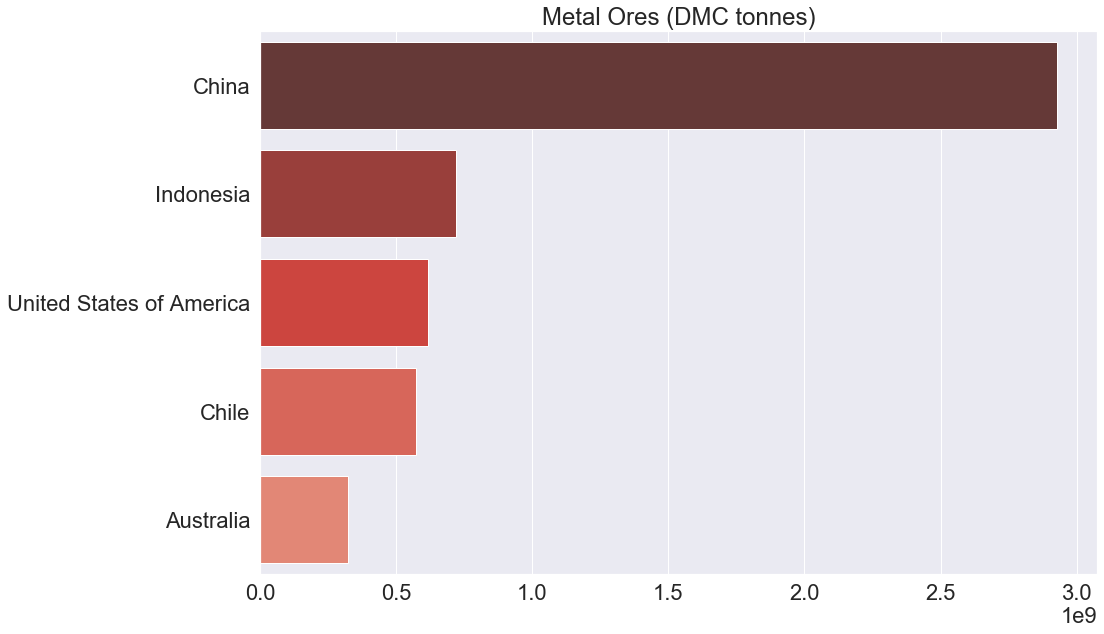

In [27]:
plt.subplots(figsize=(15, 10))
ax = df1.sort_values("Avg_consumption", ascending=False)
sns.set_color_codes("pastel")
sns.barplot(x="Avg_consumption", y="Country", data=ax,
                          palette="Reds_d").set(title = "Metal Ores (DMC tonnes)", xlabel = "", ylabel = "")
sns.set(font_scale = 2)
plt.savefig("C:\\Users\\ibsi\\Desktop\\Figure_3", transparent=True, bbox_inches="tight")